In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import sklearn.metrics 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, classification_report
import pickle
import os
import glob
import seaborn as sns
import lightgbm as lgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn import preprocessing
from sklearn.utils import class_weight
from sklearn.model_selection import cross_val_score,StratifiedKFold
import xgboost as xgb
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [3]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [5]:
i = 1
frames = []
for name in os.listdir('/home/pankaj_v/Documents/Data_analysis_dixit/dATA/client_data'):
    extents = os.path.splitext('/home/pankaj_v/Documents/Data_analysis_dixit/dATA/client_data'+'/{}'.format(name))[1].lower()
    if extents == '.csv':
        df= pd.read_csv('/home/pankaj_v/Documents/Data_analysis_dixit/dATA/client_data/{}'.format(name))
        frames.append(df)
        print('csv',df.shape)
    elif extents == '.xlsx':
        df= pd.read_excel('/home/pankaj_v/Documents/Data_analysis_dixit/dATA/client_data/{}'.format(name))
        df.columns = df.columns.astype(str)
        frames.append(df)
        print('xlx',df.shape)

result =  pd.concat(frames, axis=0, ignore_index= True)

csv (24, 1060)
csv (72, 1060)
csv (78, 1060)
csv (191, 1060)
csv (132, 1059)
csv (224, 1060)
csv (18, 1060)
csv (42, 1060)
csv (142, 1060)
csv (154, 1060)
csv (186, 1060)
csv (29, 1060)
csv (80, 1060)
csv (28, 1060)
csv (348, 1060)
csv (102, 1060)
csv (198, 1060)
csv (222, 1060)
csv (77, 1060)
csv (110, 1060)
csv (10, 1060)
xlx (680, 1059)
csv (250, 1060)
xlx (224, 1059)
csv (92, 1060)
csv (80, 1060)
csv (322, 1060)


In [27]:
result.head()

,Output,L*,a*,b*,X,Y,Z,Dominant Wavelenght,Whiteness,Purity,...,979.335,980.054,980.772,981.491,982.209,982.928,983.646,984.364,985.082,Unnamed: 1059
0,W_Calibration,100.000,0.000000,0.00000,95.0422,100.000,108.8760,565.016,99.9909,0.000017,...,100.0000,100.0000,100.0000,100.0000,100.0000,100.000,100.000,100.0,0.0000,NaN
1,F_Calibration,100.000,0.000000,0.00000,108.1040,100.000,39.2965,491.070,99.9909,0.000170,...,100.0000,100.0000,100.0000,100.0000,100.0000,100.000,100.000,100.0,100.0000,NaN
2,W_3490A2/143_K_Faint_0.501_VS2,126.073,-2.155890,6.26670,172.7770,183.723,185.0670,570.723,161.3150,0.046272,...,194.7650,195.0150,194.5450,194.8950,195.2150,87.500,12.500,75.0,0.0000,NaN
3,F_3490A2/143_K_Faint_0.501_VS2,101.668,8.011290,-51.30560,118.2650,104.375,80.6664,460.157,286.1390,0.160594,...,48.1003,47.2197,46.7071,46.3795,46.3823,367.241,284.483,-30.0,67.5824,NaN
4,W_3521A2/49_J_Medium_0.501_VS2,124.818,-0.024781,2.72268,170.0060,178.896,188.2940,576.045,169.1220,0.021647,...,189.8820,189.7280,189.3540,189.1680,190.1430,212.500,67.500,125.0,0.0000,NaN


In [28]:
result.rename(columns = {' ': 'Output'}, inplace=True)

In [29]:
result.shape

(4115, 1060)

In [30]:
result_2= result.loc[:,'356.692':'428.919']
result_2.columns
# df_without_calb_None['414.985':'537.294']

Index(['356.692', '357.472', '358.252', '359.031', '359.811', '360.59',
       '361.37', '362.149', '362.928', '363.707', '364.486', '365.266',
       '366.044', '366.823', '367.602', '368.381', '369.16', '369.938',
       '370.717', '371.496', '372.274', '373.052', '373.831', '374.609',
       '375.387', '376.165', '376.943', '377.721', '378.499', '379.277',
       '380.055', '380.833', '381.61', '382.388', '383.165', '383.943',
       '384.72', '385.498', '386.275', '387.052', '387.829', '388.606',
       '389.383', '390.16', '390.937', '391.714', '392.49', '393.267',
       '394.044', '394.82', '395.596', '396.373', '397.149', '397.925',
       '398.702', '399.478', '400.254', '401.03', '401.806', '402.581',
       '403.357', '404.133', '404.908', '405.684', '406.459', '407.235',
       '408.01', '408.786', '409.561', '410.336', '411.111', '411.886',
       '412.661', '413.436', '414.211', '414.985', '415.76', '416.535',
       '417.309', '418.084', '418.858', '419.632', '420.407', 

In [31]:
result_3 =result.loc[:,'Output']
result_2= result.loc[:,'300.377':'423.503']
result_1= result.iloc[:,1:14]


In [32]:
print(result_2.shape, result_3.shape)

(4115, 159) (4115,)


In [33]:
df = pd.concat([result_2,result_3], axis=1)
df.head()


,300.377,301.162,301.946,302.731,303.515,304.299,305.083,305.867,306.652,307.435,...,417.309,418.084,418.858,419.632,420.407,421.181,421.955,422.729,423.503,Output
0,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.000,...,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,W_Calibration
1,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.000,...,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,F_Calibration
2,178.3860,178.7920,176.8290,176.9760,177.1030,177.2450,177.7120,177.8120,178.4510,177.967,...,128.313,134.904,142.210,147.977,151.975,155.196,157.716,159.823,161.612,W_3490A2/143_K_Faint_0.501_VS2
3,48.6926,48.7965,49.2915,49.4106,49.2157,49.1247,49.1486,49.1965,49.0409,48.885,...,105.929,110.915,115.724,121.118,127.092,133.762,141.324,149.745,159.421,F_3490A2/143_K_Faint_0.501_VS2
4,184.3120,184.3250,183.4180,183.3630,183.9380,182.9080,182.6740,183.7060,183.9750,183.847,...,157.747,160.590,163.954,166.188,167.568,168.681,169.628,170.431,171.096,W_3521A2/49_J_Medium_0.501_VS2


In [34]:
# df.to_excel('/home/pankaj_v/Documents/Data_analysis_dixit/dATA/Processed_data/whole_data.xlsx')

In [35]:
df_without_calb = df[~df['Output'].str.contains(('Calibration|CALIBARTION|CALIBARATION'),case=False, regex=True, na = False)]
df_without_calb.reset_index()
df_without_calb['w/f']= df_without_calb['Output'].str.split('_').str[0]

In [36]:
df_without_calb.head()

,300.377,301.162,301.946,302.731,303.515,304.299,305.083,305.867,306.652,307.435,...,418.084,418.858,419.632,420.407,421.181,421.955,422.729,423.503,Output,w/f
2,178.3860,178.7920,176.8290,176.9760,177.1030,177.2450,177.7120,177.8120,178.4510,177.9670,...,134.9040,142.2100,147.9770,151.975,155.1960,157.7160,159.823,161.6120,W_3490A2/143_K_Faint_0.501_VS2,W
3,48.6926,48.7965,49.2915,49.4106,49.2157,49.1247,49.1486,49.1965,49.0409,48.8850,...,110.9150,115.7240,121.1180,127.092,133.7620,141.3240,149.745,159.4210,F_3490A2/143_K_Faint_0.501_VS2,F
4,184.3120,184.3250,183.4180,183.3630,183.9380,182.9080,182.6740,183.7060,183.9750,183.8470,...,160.5900,163.9540,166.1880,167.568,168.6810,169.6280,170.431,171.0960,W_3521A2/49_J_Medium_0.501_VS2,W
5,74.1362,74.0908,73.9866,73.8346,74.0716,73.9835,73.9055,73.8415,73.5831,73.8479,...,189.7980,189.3670,192.3690,199.593,209.4630,222.0550,236.689,253.5030,F_3521A2/49_J_Medium_0.501_VS2,F
8,97.0348,97.4533,97.5133,97.3271,97.1901,96.4012,96.8962,96.7024,96.8306,97.1549,...,86.6393,89.1882,91.2087,92.681,93.9616,95.0652,96.116,97.0888,W_3507A2/196_F_Very Strong_0.50_SI1,W


In [37]:
df_with_w = df_without_calb[df_without_calb['w/f'] == 'W']


In [38]:
df_with_w['color'] = df_with_w['Output'].str.split('_').str[2]
df_with_w['color'].replace({'E LB':'E', ' K':'K', 'G LB ':'G', 'H ':'H'}, inplace = True)
df_with_w['quality'] = df_with_w['Output'].str.split('_').str[3]
df_with_w['quality'].replace({'brown':'None','Pink':'None', 'LB':'None','LB ':'None', 'Faint YELLOW':'Faint', 'Faint YELLOW':'Faint', 'Faint GREEN':'Faint','  ':'None', 'BROWN':'Faint', 'Lblack':'Faint', 'lb ':'None','Black':'None'}, inplace = True)


In [39]:
df_without_calb['color'] = df_without_calb['Output'].str.split('_').str[2]
df_without_calb['color'].replace({'E LB':'E', ' K':'K', 'G LB ':'G', 'H ':'H'}, inplace = True)
df_without_calb['quality'] = df_without_calb['Output'].str.split('_').str[3]
df_without_calb['quality'].replace({'brown':'None','Pink':'None', 'LB':'None','LB ':'None', 'Faint YELLOW':'Faint', 'Faint YELLOW':'Faint', 'Faint GREEN':'Faint','  ':'None', 'BROWN':'Faint', 'Lblack':'Faint', 'lb ':'None','Black':'None'}, inplace = True)

In [48]:
df_without_calbwf_None  = df_without_calb[df_without_calb['quality'] == 'None']
df_without_calbwf_faint  = df_without_calb[df_without_calb['quality'] == 'Faint']
df_without_calbwf_medium  = df_without_calb[df_without_calb['quality'] == 'Medium']
df_without_calbwf_verystroong  = df_without_calb[df_without_calb['quality'] == 'Very Strong']
df_without_calbwf_strong = df_without_calb[df_without_calb['quality'] == 'Strong']

In [41]:
# Seperating Data with quality
df_without_calb_None  = df_without_calb[df_without_calb['quality'] == 'None']
df_without_calb_faint  = df_without_calb[df_without_calb['quality'] == 'Faint']
df_without_calb_medium  = df_without_calb[df_without_calb['quality'] == 'Medium']
df_without_calb_verystroong  = df_without_calb[df_without_calb['quality'] == 'Very Strong']
df_without_calb_strong = df_without_calb[df_without_calb['quality'] == 'Strong']

In [42]:
df_without_calb_faint.to_excel('/home/pankaj_v/Documents/Data_analysis_dixit/dATA/Processed_data/df_without_calb_faint.xlsx')




In [43]:
(df_without_calb_None.shape,
df_without_calb_faint.shape,
df_without_calb_medium.shape,
df_without_calb_verystroong.shape,
df_without_calb_strong.shape)

((1508, 163), (704, 163), (222, 163), (366, 163), (6, 163))

In [44]:
(df_without_calb_None.shape,
df_without_calb_faint.shape,
df_without_calb_medium.shape,
df_without_calb_verystroong.shape,
df_without_calb_strong.shape)

((1508, 163), (704, 163), (222, 163), (366, 163), (6, 163))

In [45]:
df_without_calb_None.head()

,300.377,301.162,301.946,302.731,303.515,304.299,305.083,305.867,306.652,307.435,...,419.632,420.407,421.181,421.955,422.729,423.503,Output,w/f,color,quality
22,99.0413,99.2209,99.1425,98.8326,98.6935,98.7623,99.2619,99.2371,99.4380,99.3996,...,97.3515,97.7555,98.0066,98.1973,98.3385,98.4313,W_3515A2/140_F_None_0.50_SI2,W,F,None
23,87.3368,86.7807,87.0579,88.0256,87.4322,86.9225,86.6374,86.3787,86.1089,86.1178,...,95.0422,95.4433,95.5570,95.9121,96.1302,96.8206,F_3515A2/140_F_None_0.50_SI2,F,F,None
26,186.9590,188.1600,188.8250,188.4600,188.6950,188.9940,188.9000,189.1640,190.0730,190.0940,...,168.3010,169.8710,170.8290,171.6470,172.3740,172.9660,W_3501A2/244_I_None_0.501_SI1,W,I,None
27,73.3829,73.7469,73.6248,73.5557,73.9620,73.8209,74.4291,74.6004,74.2504,74.4712,...,84.2542,84.9794,85.3949,85.6222,85.5052,86.0031,F_3501A2/244_I_None_0.501_SI1,F,I,None
28,188.9060,190.7830,190.7510,190.2420,190.3400,190.5320,189.6860,189.6050,190.5400,190.9290,...,173.7050,174.8990,175.6760,176.2400,176.7950,177.2350,W_3515A2/151_F_None_0.502_SI1,W,F,None


In [49]:
df_without_calbwf_None.drop(columns=['Output','quality'], inplace=True)

In [ ]:
df_without_calb_None.drop(columns=['Output','w/f','quality'], inplace=True)

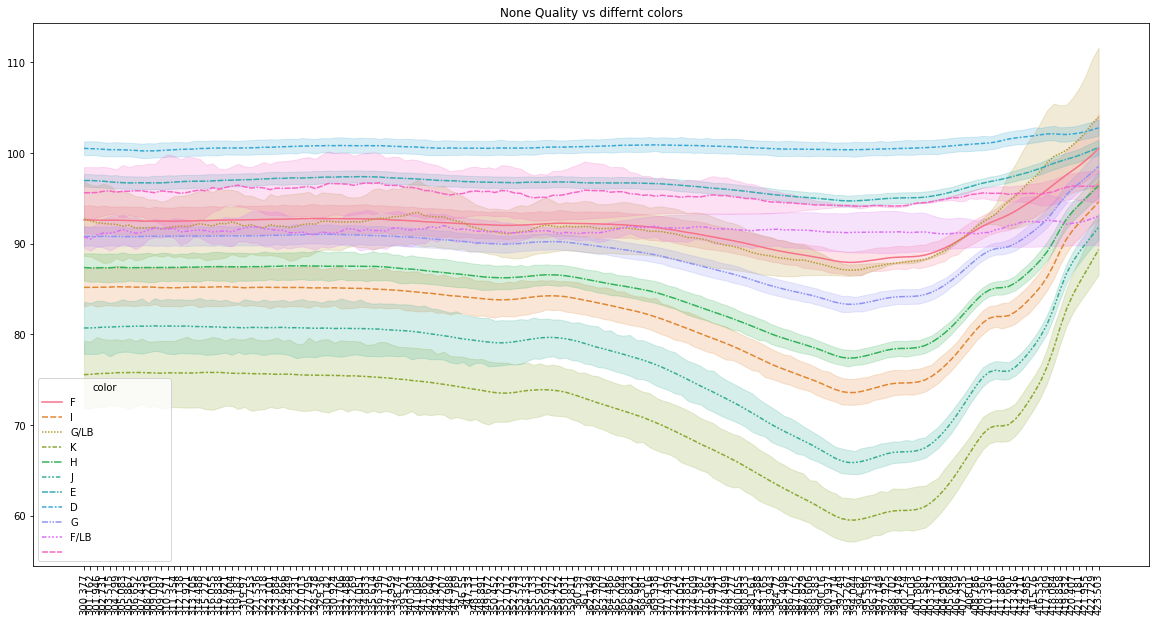

In [51]:
plt.figure(figsize=(20,10))
data1 = df_without_calb_None.set_index(["color"]).T
g1 = sns.lineplot(data=data1)
# g1.set(xticklabels=[data1.columns])
g1.set_title('None Quality vs differnt colors')
plt.xticks(rotation = 90)
plt.show()


In [30]:
X = df_without_calb_None.iloc[:,:-1]

In [31]:
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
x_norm = pd.DataFrame(np_scaled, columns = X.columns)

In [32]:
x = x_norm.iloc[:,:-1]
Y = df_without_calb_None.iloc[:,-1]

In [33]:
balanced = class_weight.compute_class_weight(class_weight='balanced', classes=df_without_calb_None['color'].value_counts().keys(),y=Y)
balanced = dict(zip(df_without_calb_None['color'].value_counts().keys(),balanced))
balanced

{'G': 0.6643700787401575,
 'D': 0.7273706896551724,
 'F': 0.7740825688073395,
 'E': 0.9698275862068966,
 'I': 1.016566265060241,
 'H': 1.0817307692307692,
 'J': 2.057926829268293,
 'K': 2.4816176470588234}

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(x,Y, test_size = 0.2, random_state =42, stratify = Y)

In [35]:
stratifiedkf=StratifiedKFold(n_splits=5)


In [36]:
light_gb_classifier = lgb.LGBMClassifier()
grid_values = {'n_estimators':[*range(50, 500, 20)], 'max_depth':[*range(1,10,1)], 'max_features':[*range(1,100,1)],'min_samples_split':np.linspace(0.1, 1.0, 10, endpoint=True),'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True)}
boost_classifier = RandomizedSearchCV(light_gb_classifier, param_distributions= grid_values , cv = stratifiedkf)

In [37]:
decision_classifier = DecisionTreeClassifier()
grid_values = {'max_depth':[*range(1,10,1)], 'max_features':[*range(1,100,1)],'min_samples_split':np.linspace(0.1, 1.0, 10, endpoint=True),'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True)}
decision_tree_classifier = RandomizedSearchCV(decision_classifier, param_distributions= grid_values , cv = 5)

In [38]:
forest_classifier = RandomForestClassifier(class_weight = balanced)
grid_values = {'n_estimators':[*range(50, 500, 20)], 'max_depth':[*range(1,10,1)], 'max_features':[*range(1,100,1)],'min_samples_split':np.linspace(0.1, 1.0, 10, endpoint=True),'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True)}
random_classifier = RandomizedSearchCV(forest_classifier, param_distributions= grid_values , cv = stratifiedkf)

In [46]:
boost_classfier = GradientBoostingClassifier()
grid_values = {'n_estimators':[*range(50, 500, 20)], 'max_depth':[*range(1,10,1)], 'max_features':[*range(1,100,1)],'min_samples_split':np.linspace(0.1, 1.0, 10, endpoint=True),'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True)}
boost_classifier = RandomizedSearchCV(boost_classfier_, param_distributions= grid_values , cv = stratifiedkf)
# score=cross_val_scoreida(logreg,X,Y,cv=stratifiedkf)
# print("Cross Validation Scores are {}".format(score))
# print("Average Cross Valtion score :{}".format(score.mean()))

In [40]:
boost_classfier_ = xgb.XGBClassifier(enabale_categorical = True)
grid_values = {'n_estimators':[*range(50, 500, 20)], 'max_depth':[*range(1,10,1)], 'max_features':[*range(1,100,1)],'min_samples_split':np.linspace(0.1, 1.0, 10, endpoint=True),'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True)}
xgboost_classifier = RandomizedSearchCV(boost_classfier_, param_distributions= grid_values , cv = stratifiedkf)
# score=cross_val_scoreida(logreg,X,Y,cv=stratifiedkf)
# print("Cross Validation Scores are {}".format(score))
# print("Average Cross Valtion score :{}".format(score.mean()))

In [41]:
pickle.dump(random_classifier, open('/home/pankaj_v/Documents/Data_analysis_dixit/Models/random_forest_model.pkl', 'wb'))

In [43]:
forest_classifier.fit(X_train, Y_train)


RandomForestClassifier(class_weight={'D': 0.7273706896551724,
                                     'E': 0.9698275862068966,
                                     'F': 0.7740825688073395,
                                     'G': 0.6643700787401575,
                                     'H': 1.0817307692307692,
                                     'I': 1.016566265060241,
                                     'J': 2.057926829268293,
                                     'K': 2.4816176470588234})

In [47]:
sfs1 = sfs(boost_classfier,
           k_features=50,
           forward=True,
           floating=False,
           verbose=2,
           scoring='f1_weighted',
           cv=5)

In [48]:
sfs1 = sfs1.fit(X_train, Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  77 out of  77 | elapsed:  2.2min finished

[2022-06-24 10:31:55] Features: 1/50 -- score: 0.4732928931385091[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  76 out of  76 | elapsed:  2.7min finished

[2022-06-24 10:34:39] Features: 2/50 -- score: 0.5154842902962066[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  3.0min finished

[2022-06-24 10:37:38] Features: 3/50 -- score: 0.5345160413356693[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [ ]:
train_preds = clf_new.predict(X_train)
test_preds = clf_new.predict(X_test)

In [ ]:
pd.DataFrame(clf.cv_results_).iloc[:,9:]

,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.324074,0.314815,0.314815,0.351852,0.324074,0.325926,0.013608,6
1,0.361111,0.407407,0.425926,0.407407,0.370370,0.394444,0.024568,2
2,0.435185,0.425926,0.388889,0.527778,0.398148,0.435185,0.049344,1
3,0.324074,0.324074,0.314815,0.324074,0.324074,0.322222,0.003704,7
4,0.324074,0.342593,0.333333,0.342593,0.305556,0.329630,0.013858,5
5,0.305556,0.296296,0.277778,0.324074,0.305556,0.301852,0.015045,9
6,0.361111,0.333333,0.324074,0.379630,0.351852,0.350000,0.019772,3
7,0.324074,0.342593,0.333333,0.342593,0.324074,0.333333,0.008282,4
8,0.305556,0.296296,0.277778,0.324074,0.305556,0.301852,0.015045,9
9,0.342593,0.287037,0.268519,0.361111,0.342593,0.320370,0.035909,8


In [ ]:
print(classification_report(Y_train, train_preds))

              precision    recall  f1-score   support

           D       0.67      0.90      0.77        93
           E       0.49      0.39      0.43        70
           F       0.55      0.59      0.57        87
           G       0.64      0.43      0.51       102
           H       0.38      0.53      0.44        62
           I       0.55      0.09      0.16        66
           J       0.27      0.12      0.17        33
           K       0.31      0.96      0.47        27

    accuracy                           0.51       540
   macro avg       0.48      0.50      0.44       540
weighted avg       0.53      0.51      0.48       540



In [ ]:
print(classification_report(Y_test, test_preds))


              precision    recall  f1-score   support

           D       0.64      0.91      0.75        23
           E       0.38      0.29      0.33        17
           F       0.52      0.50      0.51        22
           G       0.44      0.28      0.34        25
           H       0.29      0.44      0.35        16
           I       0.50      0.06      0.11        17
           J       0.33      0.12      0.18         8
           K       0.26      0.86      0.40         7

    accuracy                           0.44       135
   macro avg       0.42      0.43      0.37       135
weighted avg       0.45      0.44      0.40       135



In [ ]:
print(round(accuracy_score(Y_test, test_preds)*100,2))

86.76


In [ ]:
confusion_matrix(Y_test, test_preds)


array([[21,  1,  1,  0,  0,  0,  0,  0],
       [ 6,  7,  3,  1,  0,  0,  0,  0],
       [ 2,  4, 13,  2,  0,  1,  0,  0],
       [ 3,  1,  2, 11,  3,  4,  1,  0],
       [ 0,  0,  0,  8,  6,  2,  0,  0],
       [ 0,  0,  1,  1,  4,  9,  2,  0],
       [ 0,  0,  0,  0,  1,  0,  3,  4],
       [ 0,  0,  0,  0,  0,  1,  1,  5]])